# Gradient Descent

import 需要的套件。一般都會全部放在程式的最前面。

In [1]:
import pandas as pd

配合課程說明的案例，用python演示一次。

首先定義需要的function如下：

1. 定義模型（簡單線性迴歸）：參數是截距項、斜率，及模型的input(feature)，輸出是對應的模型預測值。

In [2]:
def model(a, b, x):

    y_hat = a + b * x

    return y_hat

2. 計算損失 & gradient：計算給定參數時（即當前模型）的損失值 & gradient。

In [3]:
def get_loss(data, a, b):

    loss = 0

    for i in range(0, data.shape[0]):
        x, y = data['x'][i], data['y'][i]
        loss += ( y - model(a, b, x))**2

    return loss

In [4]:
def get_gradient(data, a, b):

    gradient = 0

    for i in range(0, data.shape[0]):
        x, y = data['x'][i], data['y'][i]
        gradient += -2 * ( y - model(a, b, x))

    return gradient

3. 更新參數：根據輸入的gradient，以及給定的learning rate(lr)，將目前的參數值更新為新的參數值。

In [5]:
def update_param(param, gradient, lr):

    new_param = param - gradient * lr

    return new_param

定義與課程說明相同的資料如下：

In [6]:
data = pd.DataFrame({
    'x': [0.5, 2.3, 2.9],
    'y': [1.4, 1.9, 3.2]
})

## 用graident descent更新截距項
與課程說明相同，假設僅更新截距項。

In [7]:
# step 1: 隨機取值。
a = 0

In [8]:
# 初始化一些variable，供後續繪圖使用。
graph_a = []
graph_loss = []

for i in range(0, 50): # 假設僅迭代50次。
    print(f'>>> iteration: {i}')

    # step 2: 計算gradient。
    gradient = get_gradient(data=data, a=a, b=0.64)
    print(f'gradient = {gradient:.4f}')

    # step 3: 更新參數
    a = update_param(param=a, gradient=gradient, lr=0.1)
    print(f'a = {a:.4f}')

    # 儲存每一次迭代時的截距項，供繪圖用。
    graph_a.append(a)

    # 儲存並計算每一次迭代時的損失，供繪圖用。
    loss = get_loss(data=data, a=a, b=0.64)
    graph_loss.append(loss)
    print(f'loss: {loss:.4f}\n')

>>> iteration: 0
gradient = -5.7040
a = 0.5704
loss: 0.8784

>>> iteration: 1
gradient = -2.2816
a = 0.7986
loss: 0.5140

>>> iteration: 2
gradient = -0.9126
a = 0.8898
loss: 0.4557

>>> iteration: 3
gradient = -0.3651
a = 0.9263
loss: 0.4464

>>> iteration: 4
gradient = -0.1460
a = 0.9409
loss: 0.4449

>>> iteration: 5
gradient = -0.0584
a = 0.9468
loss: 0.4447

>>> iteration: 6
gradient = -0.0234
a = 0.9491
loss: 0.4446

>>> iteration: 7
gradient = -0.0093
a = 0.9500
loss: 0.4446

>>> iteration: 8
gradient = -0.0037
a = 0.9504
loss: 0.4446

>>> iteration: 9
gradient = -0.0015
a = 0.9506
loss: 0.4446

>>> iteration: 10
gradient = -0.0006
a = 0.9506
loss: 0.4446

>>> iteration: 11
gradient = -0.0002
a = 0.9507
loss: 0.4446

>>> iteration: 12
gradient = -0.0001
a = 0.9507
loss: 0.4446

>>> iteration: 13
gradient = -0.0000
a = 0.9507
loss: 0.4446

>>> iteration: 14
gradient = -0.0000
a = 0.9507
loss: 0.4446

>>> iteration: 15
gradient = -0.0000
a = 0.9507
loss: 0.4446

>>> iteration: 16


<Axes: xlabel='a', ylabel='loss'>

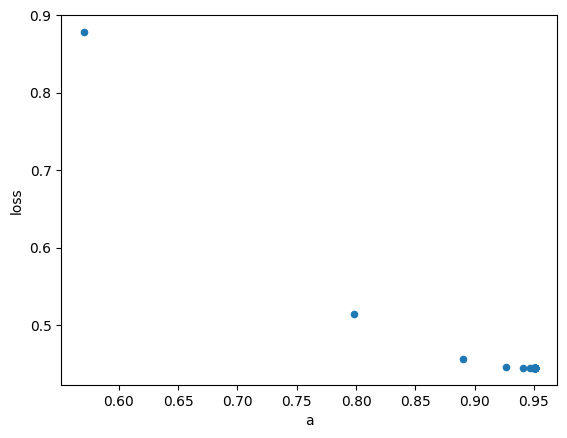

In [9]:
graph_df = pd.DataFrame({'a': graph_a, 'loss': graph_loss})
graph_df.plot.scatter(x='a', y='loss')

可以看到上圖顯示，迭代了50次之後，截距項從0逐漸移動至0.95附近。

## 用graident descent更新截距項 & 斜率

接著，下面的程式示範了如何同時更新截距項 & 斜率。

In [10]:
def get_gradients(data, a, b):

    gradient_a = 0
    gradient_b = 0

    for i in range(0, data.shape[0]):
        x, y = data['x'][i], data['y'][i]
        gradient_a += -2 * ( y - model(a, b, x))
        gradient_b += -2 * x * ( y - model(a, b, x))

    return gradient_a, gradient_b

In [11]:
# step 1: 隨機取值。
a = 0
b = 1

In [12]:
# 初始化一些variable，供後續繪圖使用。
graph_a = []
graph_b = []
graph_loss = []

for i in range(0, 701):
    # step 2: 計算gradient。
    gradient_a, gradient_b = get_gradients(data=data, a=a, b=b)

    # step 3: 更新參數
    a = update_param(param=a, gradient=gradient_a, lr=0.01)
    b = update_param(param=b, gradient=gradient_b, lr=0.01)

    # 儲存每一次迭代時的截距項，供繪圖用。
    graph_a.append(a)
    graph_b.append(b)

    # 儲存並計算每一次迭代時的損失，供繪圖用。
    loss = get_loss(data=data, a=a, b=b)
    graph_loss.append(loss)

    # 因為迭代的次數較多，讓程式每迭代10次才print內容。
    if i % 10 == 0:
        print(f'>>> iteration: {i}')
        print(f'gradient_a = {gradient_a:.4f}, gradient_b = {gradient_b:.4f}')
        print(f'a = {a:.4f}, b = {b:.4f}')
        print(f'loss: {loss:.4f}')
        print('')

>>> iteration: 0
gradient_a = -1.6000, gradient_b = -0.8000
a = 0.0160, b = 1.0080
loss: 1.0311

>>> iteration: 10
gradient_a = -0.9601, gradient_b = 0.3810
a = 0.1269, b = 0.9906
loss: 0.9005

>>> iteration: 20
gradient_a = -0.8470, gradient_b = 0.3603
a = 0.2163, b = 0.9531
loss: 0.8068

>>> iteration: 30
gradient_a = -0.7549, gradient_b = 0.3216
a = 0.2958, b = 0.9192
loss: 0.7324

>>> iteration: 40
gradient_a = -0.6729, gradient_b = 0.2867
a = 0.3667, b = 0.8890
loss: 0.6733

>>> iteration: 50
gradient_a = -0.5998, gradient_b = 0.2556
a = 0.4299, b = 0.8621
loss: 0.6263

>>> iteration: 60
gradient_a = -0.5347, gradient_b = 0.2278
a = 0.4863, b = 0.8381
loss: 0.5890

>>> iteration: 70
gradient_a = -0.4766, gradient_b = 0.2031
a = 0.5365, b = 0.8167
loss: 0.5594

>>> iteration: 80
gradient_a = -0.4249, gradient_b = 0.1810
a = 0.5812, b = 0.7976
loss: 0.5358

>>> iteration: 90
gradient_a = -0.3787, gradient_b = 0.1614
a = 0.6212, b = 0.7806
loss: 0.5171

>>> iteration: 100
gradient_a 

In [13]:
graph_df = pd.DataFrame({'a': graph_a, 'b': graph_b, 'loss': graph_loss})

<Axes: xlabel='a', ylabel='loss'>

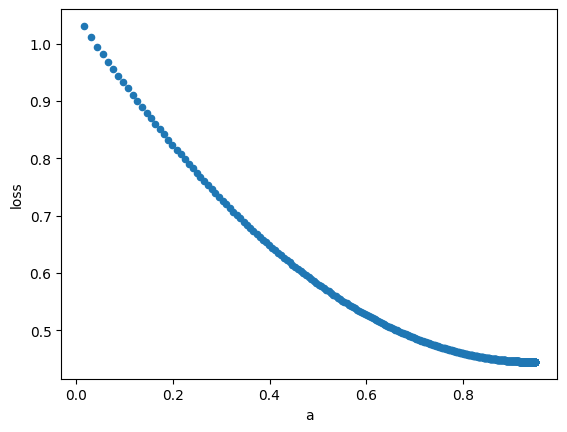

In [14]:
graph_df.plot.scatter(x='a', y='loss')

<Axes: xlabel='b', ylabel='loss'>

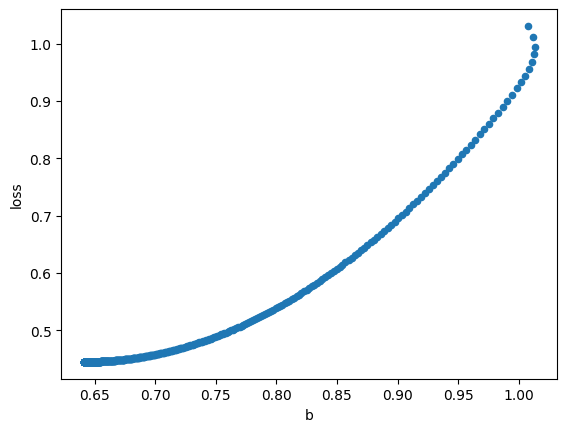

In [15]:
graph_df.plot.scatter(x='b', y='loss')

In [16]:
print(f'final a: {graph_a[-1]}')
print(f'final b: {graph_b[-1]}')

final a: 0.9484228728799461
final b: 0.6411513598871877


依照上面的結果，gradient descent方法，找到的a是接近0.95，b則是約0.64。

接下來測試如果使用傳統OLS方法，估計出來的數值是否接近。

### OLS 結果比較

In [17]:
import statsmodels.formula.api as smf
%matplotlib inline

這邊使用的套件是statsmodels，可以用類似寫方程式的方法來跑統計模型。

In [18]:
result = smf.ols('y ~ x', data=data).fit()

結果如下：

估計結果其實很接近gradient descent的估計方法。

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2.884
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.339
Time:                        23:22:17   Log-Likelihood:                -1.3931
No. Observations:                   3   AIC:                             6.786
Df Residuals:                       1   BIC:                             4.983
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9487      0.814      1.165      0.4

/Users/curtislu/Library/Caches/pypoetry/virtualenvs/ntu-ps-intro-ml-GyDE60mE-py3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


也可以使用Scikit-learn套件的LinearRegression來做到一樣的結果。

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
# Creating a Linear Regression model object
model = LinearRegression()

# Fitting the model to the data (data需整理成符合規格的形狀)
model.fit(data['x'].values.reshape(-1, 1), data['y'].values)

# Once fitted, you can get the coefficients and intercept of the linear regression line
print(f"Coefficient (slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (slope): [0.64102564]
Intercept: 0.9487179487179489
